# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 


# Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [6]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [24]:
print(f"Shape: {data.shape}\n")
print(f"Columns: \n{data.columns}")

print(f"\nNAN values: \n{data.isna().sum()}\n")

duplicated_rows = data[data.duplicated()]
print(f"Duplicates: {duplicated_rows.shape}")

print(f"\nDatatypes: \n{data.dtypes}")

data.sample(5)

Shape: (5391, 6)

Columns: 
Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')

NAN values: 
Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

Duplicates: (0, 6)

Datatypes: 
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1080,4602,4/15/1998,24 7: Twenty Four Seven,"$2,000,000","$72,544","$72,544"
769,2236,2/6/1995,The Bridges of Madison County,"$22,000,000","$175,516,617","$71,516,617"
3216,1523,9/5/2008,What Happens in Vegas...,"$35,000,000","$218,535,708","$80,277,646"
4059,652,12/25/2011,War Horse,"$70,000,000","$156,815,529","$79,883,359"
2405,4109,4/3/2005,Dear Frankie,"$4,600,000","$3,099,369","$1,340,891"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [31]:
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_clean:
    data[col] = data[col].astype(str).str.replace('[$,]', '', regex=True).astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   5391 non-null   int64  
 1   Release_Date           5391 non-null   object 
 2   Movie_Title            5391 non-null   object 
 3   USD_Production_Budget  5391 non-null   float64
 4   USD_Worldwide_Gross    5391 non-null   float64
 5   USD_Domestic_Gross     5391 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [37]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'], format='%m/%d/%Y')

print(data.info())
data.sample()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   float64       
 4   USD_Worldwide_Gross    5391 non-null   float64       
 5   USD_Domestic_Gross     5391 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 252.8+ KB
None


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2643,4132,2006-04-05,Chinjeolhan geumjassi,"4,500,000.00","23,471,871.00","211,667.00"


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [57]:
pd.options.display.float_format = '{:,.2f}'.format
print(f"{data.describe()}\n")

# What is the average production budget of the films in the data set?
print(f"Average Production Cost: ${data.USD_Production_Budget.mean():,.2f}\n")

# What is the average worldwide gross revenue of films?
print(f"Average WW Gross Revenue: ${data.USD_Worldwide_Gross.mean():,.2f}\n")

# What were the minimums for worldwide and domestic revenue?
print(f"Min WW Gross Revenue: ${data.USD_Worldwide_Gross.min():,.2f}\n")
print(f"Min USA Gross Revenue: ${data.USD_Domestic_Gross.min():,.2f}\n")

# Are the bottom 25% of films actually profitable or do they lose money?
#           Rank                   Release_Date  USD_Production_Budget    USD_Worldwide_Gross  USD_Domestic_Gross 
# 25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   3,865,206.00        1,330,901.50  

# What are the highest production budget and highest worldwide gross revenue of any film?
print(f"Max Budget: ${data.USD_Production_Budget.max():,.2f}\n")
print(f"Max WW Revenue: ${data.USD_Worldwide_Gross.max():,.2f}\n")

print(data[data.USD_Production_Budget == 1100])
print(data[data.USD_Production_Budget == 425000000])

          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max     

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [61]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 in US {len(zero_domestic)}')

zero_domestic.sort_values('USD_Production_Budget', ascending=False)



Number of films that grossed $0 in US 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla","80,000,000.00","4,547,660.00",0.00
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,"15,000.00",0.00,0.00
3056,5374,2007-12-31,Tin Can Man,"12,000.00",0.00,0.00
4907,5381,2015-05-19,Family Motocross,"10,000.00",0.00,0.00
5006,5389,2015-09-29,Signed Sealed Delivered,"5,000.00",0.00,0.00


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [62]:
zero_ww = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 in US {len(zero_ww)}')

zero_ww.sort_values('USD_Worldwide_Gross', ascending=False)

Number of films that grossed $0 in US 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00
4786,5364,2014-12-31,Dry Spell,"22,000.00",0.00,0.00
4852,5016,2015-03-13,Walter,"700,000.00",0.00,0.00
4846,4503,2015-03-07,Stung,"2,500,000.00",0.00,0.00
4843,4956,2015-03-03,Ask Me Anything,"950,000.00",0.00,0.00
...,...,...,...,...,...,...
4068,4104,2011-12-31,Without Men,"4,700,000.00",0.00,0.00
4067,4085,2011-12-31,We Have Your Husband,"5,000,000.00",0.00,0.00
4066,3901,2011-12-31,Freaky Deaky,"6,000,000.00",0.00,0.00
4046,5368,2011-11-25,The Ridges,"17,300.00",0.00,0.00


### Filtering on Multiple Conditions

In [65]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                    (data.USD_Worldwide_Gross != 0)]
print(f"Number of international releases: {len(international_releases)}")

international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [66]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')

international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00
5374,4237,2017-08-25,Polina danser sa vie,"4,000,000.00","36,630.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [8]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [68]:
unreleased = data[data.Release_Date >= scrape_date]
print(f"Number of unreleased movies = {len(unreleased)}")

Number of unreleased movies = 7


In [69]:
data_clean = data.drop(unreleased.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [74]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
f"{((money_losing.shape[0]/data_clean.shape[0]) * 100):,.2f}%"


'37.28%'

# Seaborn for Data Viz: Bubble Charts

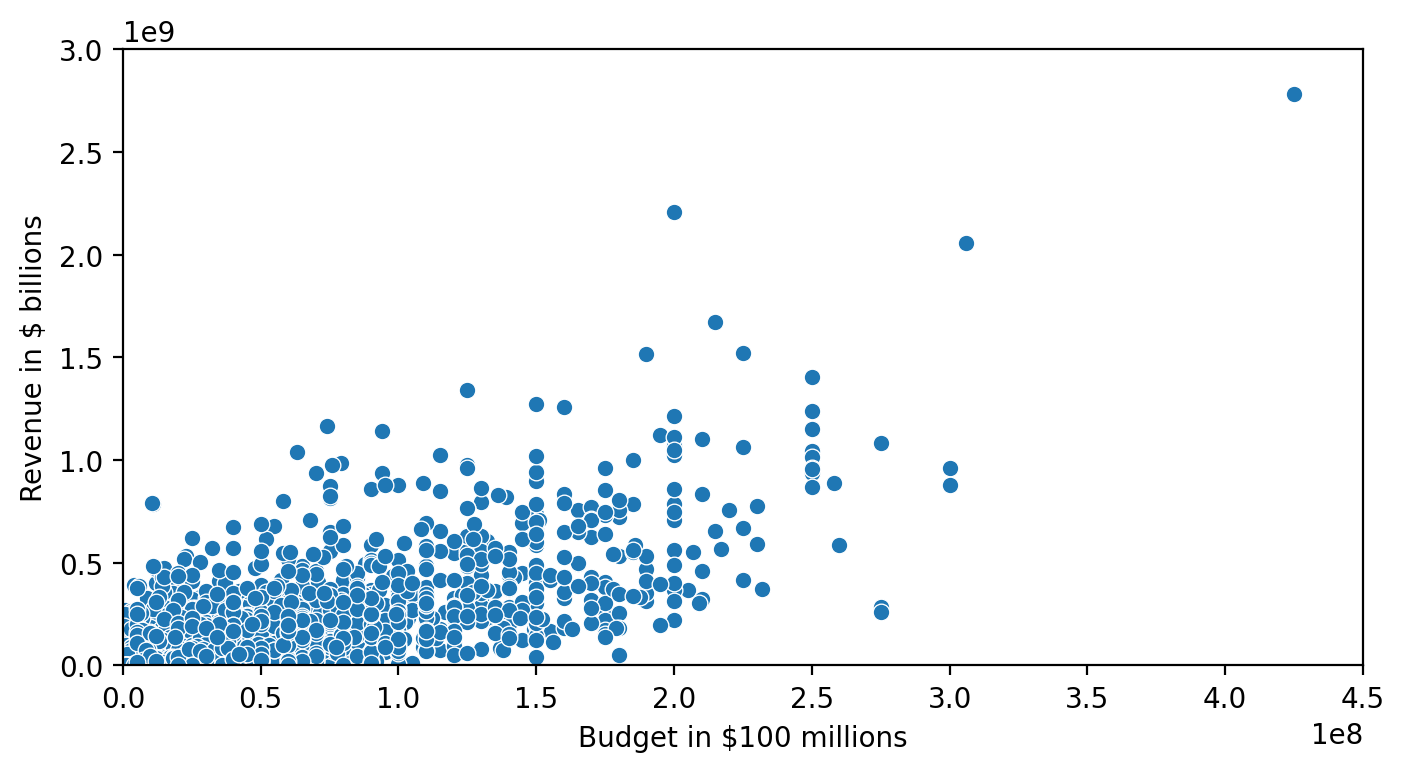

In [77]:
import seaborn as sns


plt.figure(figsize=(8,4), dpi=200)
    
ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget', 
                        y='USD_Worldwide_Gross')
    
ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
    
plt.show()

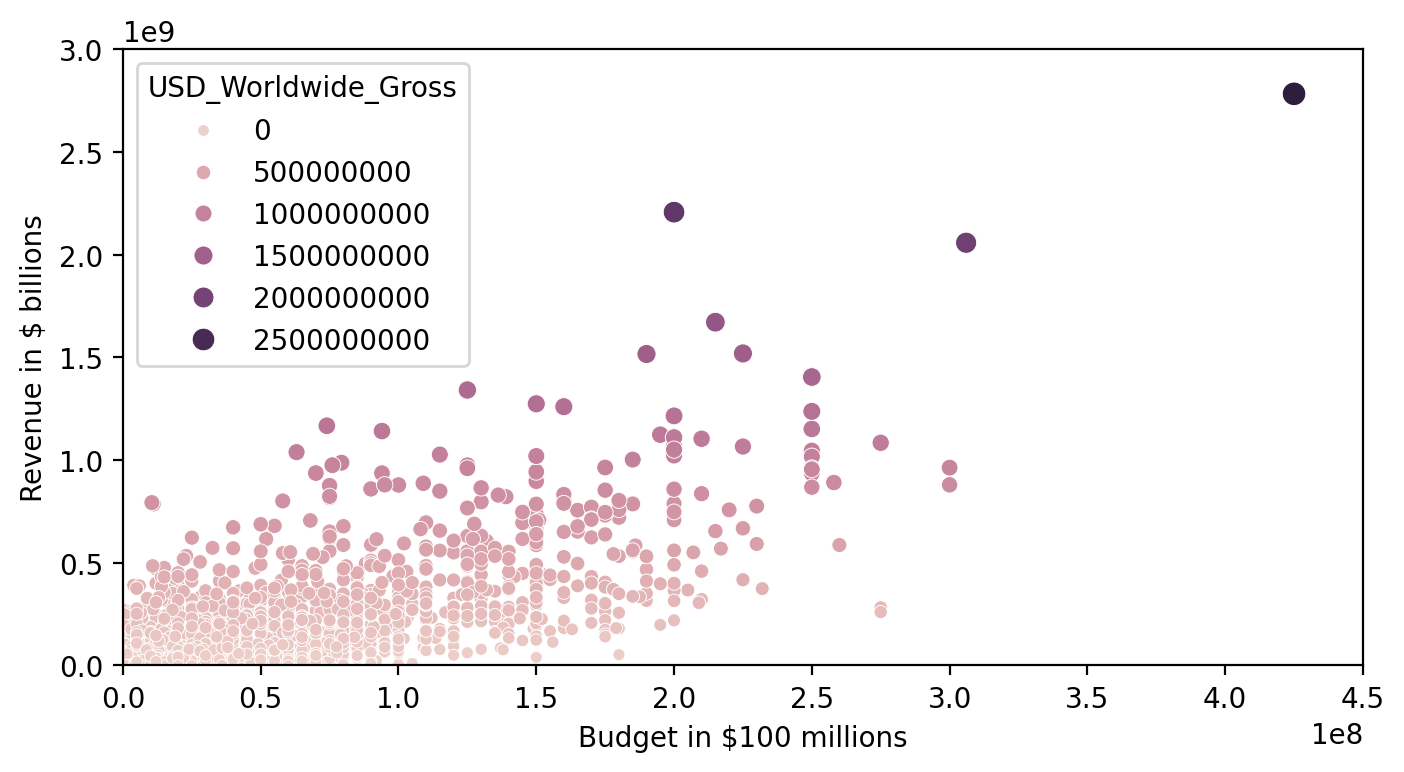

In [78]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget', 
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross', # colour
                        size='USD_Worldwide_Gross',) # dot size
    
ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions',)
    
plt.show()

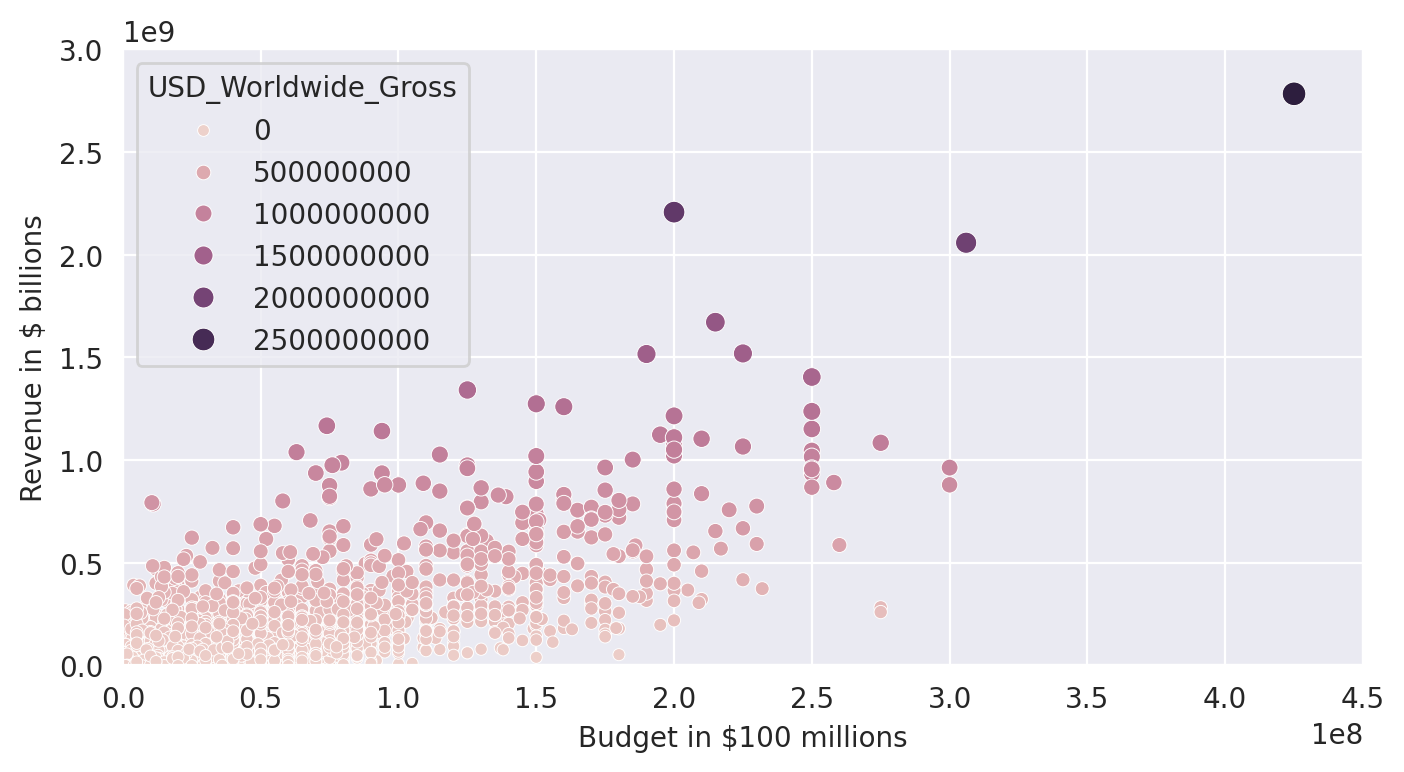

In [79]:
# To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's with keyword. We've seen with used already when it comes to opening files in previous lessons.

plt.figure(figsize=(8,4), dpi=200)
    
# set styling on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget', 
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross',
                        size='USD_Worldwide_Gross')
    
    ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:




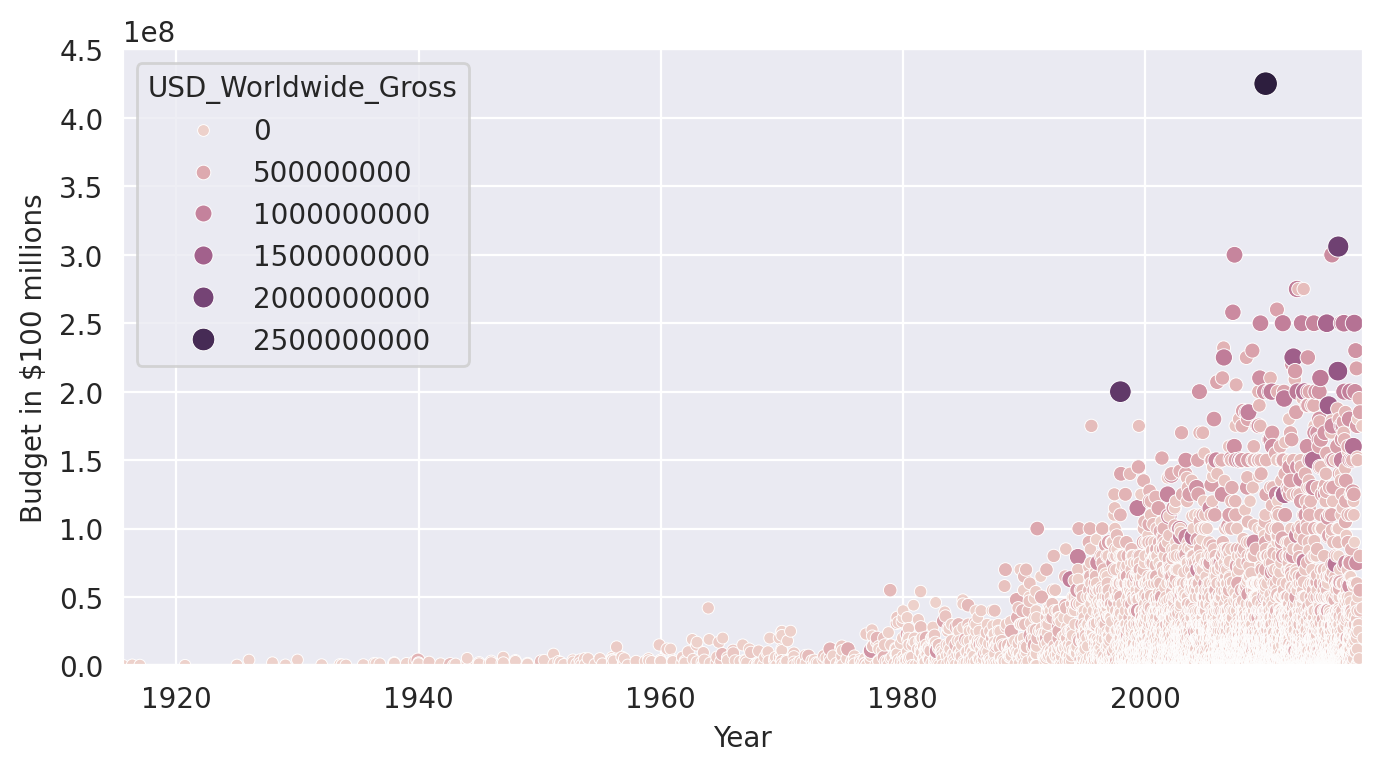

In [80]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 


Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [82]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year

# 5.0 / 2
# # output: 2.5
# 5.0 // 2
# # output: 2.0

decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [85]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

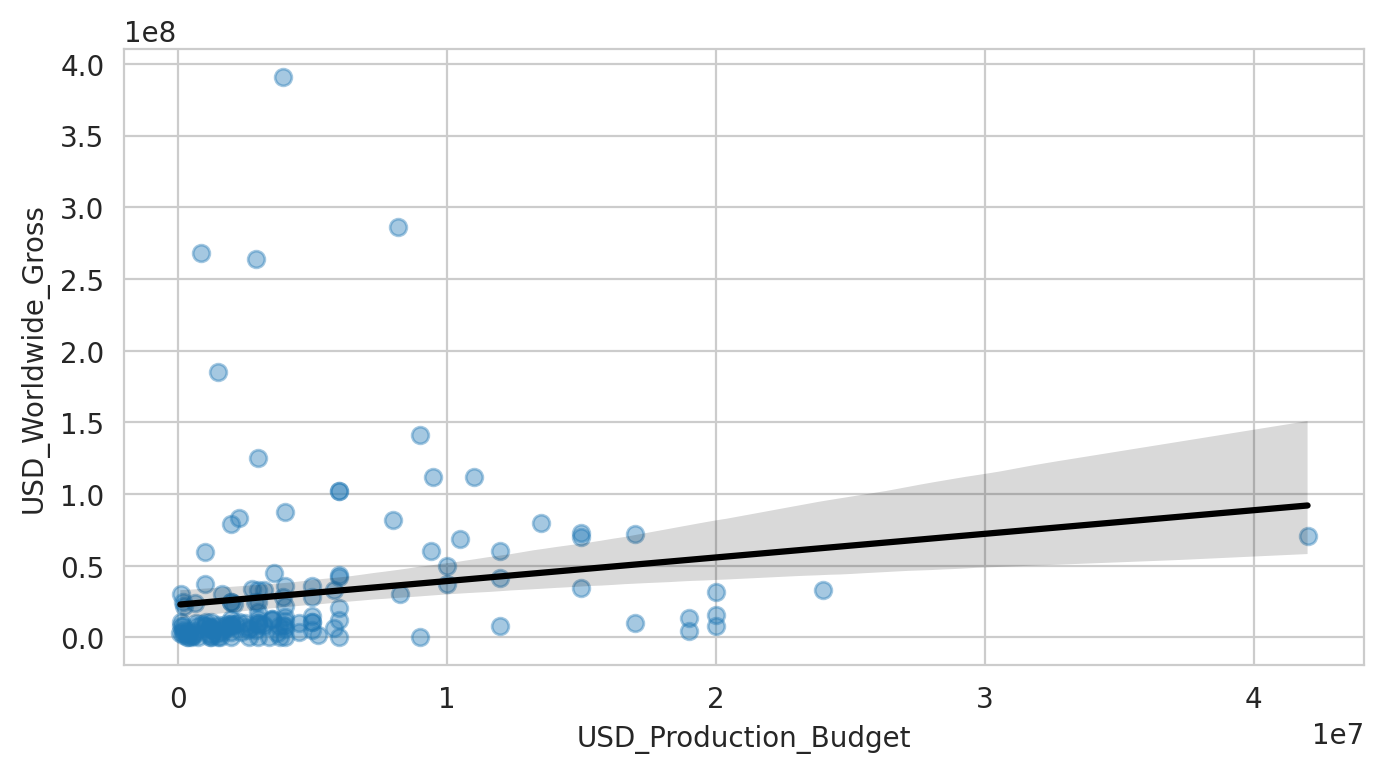

In [88]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

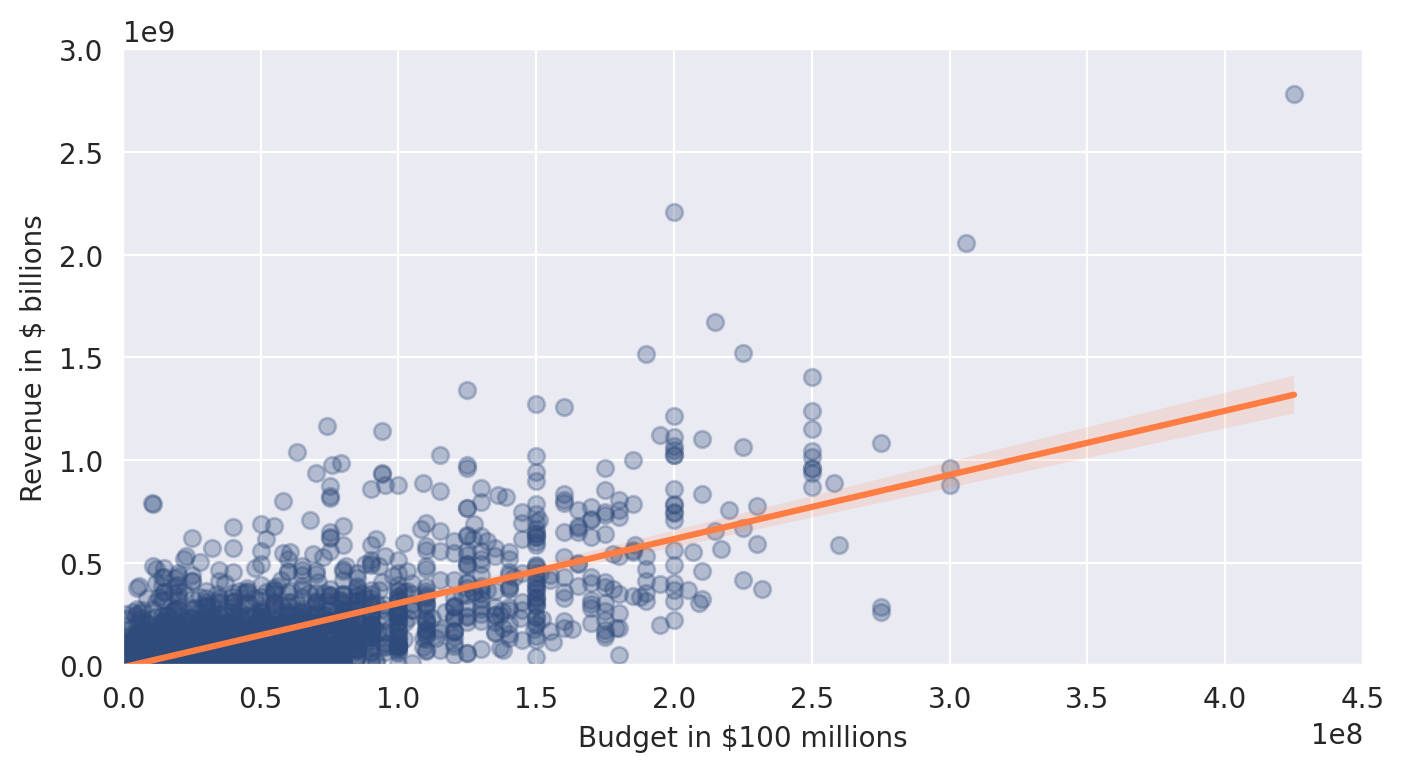

In [ ]:
# Use Seaborn's .regplot() to show the scatter plot and linear regression line against the new_films.

# Style the chart
#     Put the chart on a 'darkgrid'.
#     Set limits on the axes so that they don't show negative values.
#     Label the axes on the plot "Revenue in $ billions" and "Budget in $ millions".
#     Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

# Interpret the chart
#     Do our data points for the new films align better or worse with the linear regression than for our older films?
#     Roughly how much would a film with a budget of $150 million make according to the regression line?


plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    color='#2f4b7c',
                    scatter_kws = {'alpha': 0.3},
                    line_kws = {'color': '#ff7c43'})
    
    ax.set(ylim=(0, 3000000000),
            xlim=(0, 450000000),
            ylabel='Revenue in $ billions',
            xlabel='Budget in $100 millions') 

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line. 

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [ ]:
# Use scikit-learn to Run Your Own Regression

# Let's dive into our linear regression model a bit more. We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

# Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. The regression line has the following structure:

# To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

# So how can we find out what our model's estimates are for theta-one and theta-zero? And how can we run our own regression, regardless of whether we want to visualise it on a chart? For that, we can use scikit-learn.

# Import scikit-learn

# Let's add the LinearRegression from scikit-learn to our notebook.

# Now we can run a LinearRegression. First, let's create a LinearRegression object that will do the work for us.

#     regression = LinearRegression()

# Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital X and the target named lower case y:

#     # Explanatory Variable(s) or Feature(s)
#     X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
     
#     # Response Variable or Target
#     y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

# Our LinearRegression does not like receiving Pandas Series (e.g., new_films.USD_Production_Budget), so I've created some new DataFrames here.

# Now it's time to get to work and run the calculations:

#     # Find the best-fit line
#     regression.fit(X, y)

# That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

# Both intercept_ and coef_ are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

# How do we interpret the y-intercept? Literally, means that if a movie budget is $0, the estimated movie revenue is -$8.65 million. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

# What about the slope? The slope tells us that for every extra $1 in the budget, movie revenue increases by $3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

# R-Squared: Goodness of Fit

# One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

#     # R-squared
#     regression.score(X, y)

# We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

# Remember how we were quite sceptical about our regression looking at the chart for our old_films? 

In [92]:
from sklearn.linear_model import LinearRegression

# Create regression object
regression = LinearRegression()

In [93]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [94]:
# Find the best-fit line
regression.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
# Theta zero
regression.intercept_

array([-8650768.00661042])

In [96]:
# Theta one
regression.coef_

array([[3.12259592]])

In [97]:
# R-squared
regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [98]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'The slope coefficient is: {regression.coef_[0]}')
print(f'The intercept is: {regression.intercept_[0]}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080386
The r-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [99]:
22821538 + 1.64771314 * 350000000

599521137.0

In [ ]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
